## Communicate Data Findings  (Loan Data from Prosper)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#sd">Storing Data</a></li>
<li><a href="#visualization">Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='visualization'></a>
## Visualization

### What is the maximum loan term in months?
The largest proportion of borrowers prefer 36 months

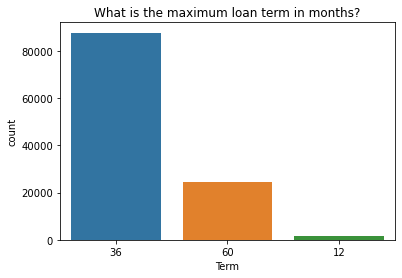

In [24]:
sb.countplot(data=Loan, x='Term', order=[36,60,12])
plt.title("What is the maximum loan term in months?");

### What is the percentage of current loan status?
Loan status is 56,576 currently in progress

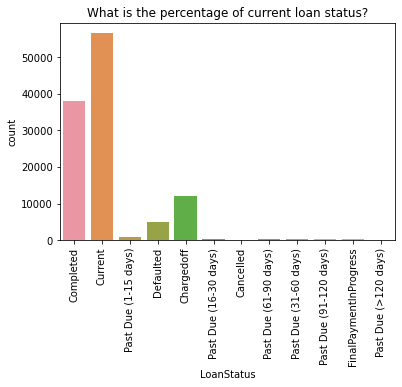

In [26]:
sb.countplot(data=Loan, x='LoanStatus')
plt.title("What is the percentage of current loan status?");
plt.xticks(rotation=90);

### What is the classification of loans based on prosper rating number?
Most loans fall into the Prosper Rating (numeric) in 4 rating 

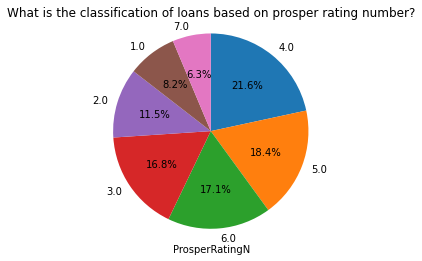

In [31]:
ProsperRatingN = Loan['ProsperRatingN'].value_counts()
plt.pie(ProsperRatingN, labels = ProsperRatingN.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title("What is the classification of loans based on prosper rating number?")
plt.xlabel("ProsperRatingN")
plt.axis('square');

### The classification of loans based on Literal prosper rating?
Most loans fall into the Prosper Rating (literal) in C Rating 

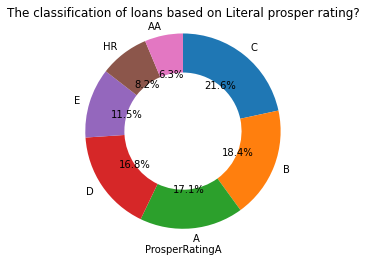

In [34]:
ProsperRatingA_counts = Loan['ProsperRatingA'].value_counts()

plt.pie(ProsperRatingA_counts, labels = ProsperRatingA_counts.index, startangle = 90, autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("The classification of loans based on Literal prosper rating?")
plt.xlabel("ProsperRatingA")
plt.axis('square');

### What is the percentage of loans at risk based on Prosper Score?
The largest percentage of loans are located at 4 score

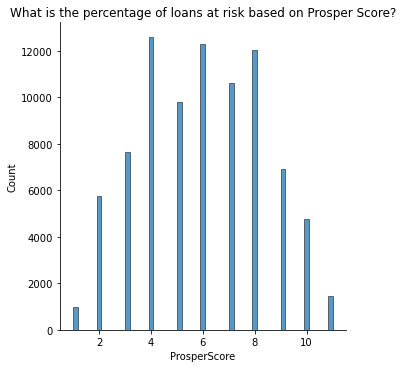

In [36]:
sb.displot(Loan['ProsperScore'], kind='hist')
plt.title("What is the percentage of loans at risk based on Prosper Score?");

### What are the employment statuses of borrowers?
largest percentage employment status for the borrowers is for employees

<Figure size 432x288 with 0 Axes>

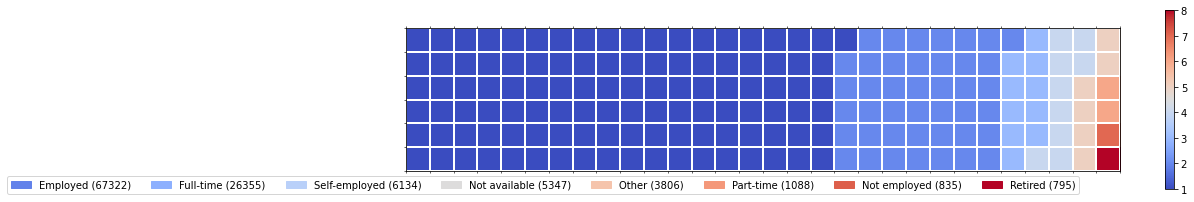

In [41]:
import matplotlib as mpl
import matplotlib.patches as mpatches

# Make a dataframe with categories and values
Loan = pd.DataFrame({ 'catagories': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired'], 
                    'values': [67322, 26355, 6134, 5347, 3806, 1088, 835, 795] })

# Define a desired height and width.
waffle_plot_width = 30
waffle_plot_height = 6

classes = Loan['catagories']
values = Loan['values']

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    plot_matrix = np.zeros((height, width))

    class_index = 0
    tile_index = 0

    for col in range(waffle_plot_width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_class[0:class_index]):

                class_index += 1       

            plot_matrix[row, col] = class_index

    # Create a new figure
    fig = plt.figure()

    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Add the legend.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c + " (" + str(values[i]) + ")"
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])

# Call the plotting function.
waffle_plot(classes, values, waffle_plot_height, waffle_plot_width,
            plt.cm.coolwarm);

### What the Investment percentage based on Listing Category?
Comparison between Investment percentage based on listing category debt consolidation loans got the highest investment rate with more than 1200 investments

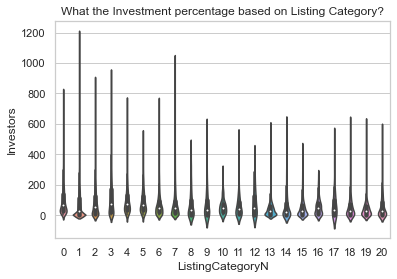

In [71]:
sb.violinplot(data=Loan, x='ListingCategoryN', y='Investors')
plt.title("What the Investment percentage based on Listing Category?");

### Is there a relationship between Employment Status and monthly loan payment status?
It was noted that the amount of the monthly payment depends on the job status of the borrower, as the employees are the most who paid monthly loans

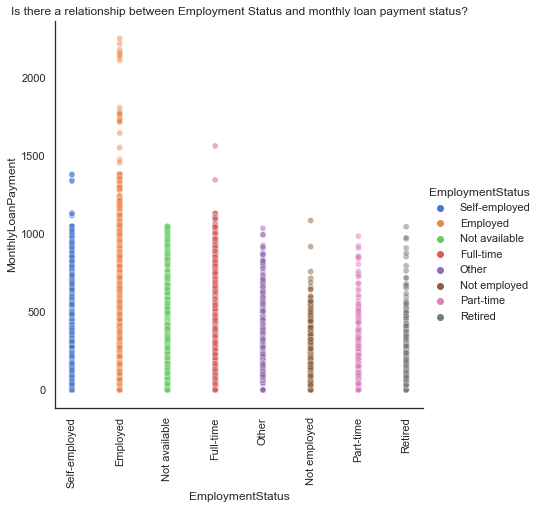

In [72]:
import seaborn as sns
sns.set_theme(style="white")

sns.relplot(x="EmploymentStatus", y="MonthlyLoanPayment", hue="EmploymentStatus",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=Loan)
plt.title("Is there a relationship between Employment Status and monthly loan payment status?")
plt.xticks(rotation=90);

### What is the relationship of Income Range to the Listing Category? 
The comparison between both income and the listing category is that the highest percentage of non-employees are interested in Medical/Dental, while those whose income reaches 25000 are in green loans

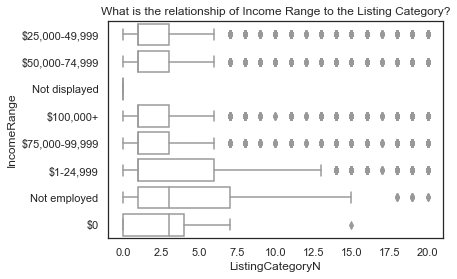

In [73]:
sb.boxplot(data=Loan, y='IncomeRange', x='ListingCategoryN', color = 'white')
plt.title("What is the relationship of Income Range to the Listing Category?");

In [82]:
!jupyter nbconvert  "C:\Users\sahar\Desktop\Data Analysis\Pro 5\Project_55.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook C:\Users\sahar\Desktop\Data Analysis\Pro 5\Project_5.ipynb to slides
[NbConvertApp] Writing 841377 bytes to C:\Users\sahar\Desktop\Data Analysis\Pro 5\Project_5.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\sahar\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\sahar\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\sahar\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\sahar\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\sahar\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_no